In [1]:
%env CUDA_VISIBLE_DEVICES=0,3
# %env LD_LIBRARY_PATH = ''
try:
  from typing import Literal
  ModelName = Literal["MViTv2-B", "MViTv2-S", "MViTv2-L", "MViTv2-T", ]
except ImportError:
  ModelName = str
import torch
import torchvision.transforms.functional as F
import numpy as np
from mvit.datasets.tractoembedding import Tractoembedding

gpus_str = ''
gpus_list = []
# for i in range(torch.cuda.device_count()):
#     used,all=torch.cuda.mem_get_info(device=i)
#     if used/all >=0.80:
#         gpus_str+=f'{i},'
#         gpus_list += [i]
# os.environ['CUDA_VISIBLE_DEVICES'] = gpus_str[:-1]
# world_size = num_proc * num_shards
# rank = shard_id * num_proc + local_rank
from matplotlib import pyplot as plt
def load_model_and_preproc(model="MViTv2-mri", use_cuda:bool=torch.cuda.is_available(), use_half:bool=True):
    """
    Load an MViT2 model and get the image transformer
    :param model: the name of the model. Should be  one of "MViTv2-B", "MViTv2-S", "MViTv2-L", "MViTv2-T". Defaults to "MViTv2-B".
    :param use_cuda: whether to use cuda. Defaults to True if cuda is available.
    :param use_half: whether to use half-precision. Defaults to True, but will not be used if cuda is not used.
    :returns a tuple of (the model, image transformer)
    """
    model = model.replace('-','_')
    use_half &= use_cuda

    import urllib.request
    from mvit.config.defaults import get_cfg
    from mvit.models import build_model
    from mvit.datasets import Tractoembedding
    from mvit.datasets import loader
    mode = 'fusion'#多模态融合模式，FA1,density，trace1
    ckpt_path = '/data01/zixi/TractoFormer/TractoFormer-MVIT-main/new_500_v3_0_94!!!!/checkpoints/checkpoint_epoch_00095.pyth'
    # ckpt_path = f"/data04/junyi/results/mvit_balanced_fold_new_norm_direct/{mode}_3_030_0123/checkpoints/checkpoint_epoch_00160.pyth"
    # if not os.path.exists(ckpt_path):
    #     urllib.request.urlretrieve(f"https://dl.fbaipublicfiles.com/mvit/mvitv2_models/{ckpt_path}", ckpt_path)
    cfg = get_cfg()
    
    # cfg.MVIT.CLS_EMBED_ON = True
    cfg.DATA.PATH_TO_DATA_DIR = '/data01/zixi/TractoFormer/TractoFormer-MVIT-main/fold_140_balanced_5fold_sorted_age.csv'
    # cfg.merge_from_file(f"./configs/test/{model.replace('ViT','VIT')}_test.yaml")
    cfg.merge_from_file('configs/MVITv2_mri.yaml')
    cfg.DATA.MODE = 'fusion'
    cfg.MVIT.CLS_EMBED_ON = True
    cfg.DATA_AUG_NUM =1
    cfg.DATA_NUM = 3
    cfg.NUM_GPUS = 1
    cfg.DATA_MODE = mode
    cfg.TRAIN.BATCH_SIZE = 4

    model = build_model(cfg)
    ckpt = torch.load(ckpt_path)
    model.load_state_dict(ckpt["model_state"])
    
    model.eval()
    # if use_half:
    #     model = model.half()
    return model,loader.construct_loader(cfg, "val",0)
    
model, datagen = load_model_and_preproc()
datagen.dataset.return_subid = True
input_images, labels, sub_ids = next(iter(datagen))
print("当前 batch 的脑 ID:", sub_ids)

env: CUDA_VISIBLE_DEVICES=0,3


/tmp/ipykernel_1367841/777301576.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path)


<class 'mvit.datasets.tractoembedding.Tractoembedding'>
(4, 3)
当前 batch 的脑 ID: tensor([130720, 130821, 129634, 130114])


In [2]:
ckpt = torch.load('/data01/zixi/TractoFormer/TractoFormer-MVIT-main/new_500_v3_0_94!!!!/checkpoints/checkpoint_epoch_00095.pyth', map_location='cpu')
print([k for k in ckpt["model_state"].keys() if "blocks" in k][:20])


/tmp/ipykernel_1367841/2973042180.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('/data01/zixi/TractoFormer/TractoFormer-MVIT-main/new_500_v3_0_94!!!!

['model_list.0.blocks.0.norm1.weight', 'model_list.0.blocks.0.norm1.bias', 'model_list.0.blocks.0.attn.rel_pos_h', 'model_list.0.blocks.0.attn.rel_pos_w', 'model_list.0.blocks.0.attn.qkv.weight', 'model_list.0.blocks.0.attn.qkv.bias', 'model_list.0.blocks.0.attn.proj.weight', 'model_list.0.blocks.0.attn.proj.bias', 'model_list.0.blocks.0.attn.pool_q.weight', 'model_list.0.blocks.0.attn.norm_q.weight', 'model_list.0.blocks.0.attn.norm_q.bias', 'model_list.0.blocks.0.attn.pool_k.weight', 'model_list.0.blocks.0.attn.norm_k.weight', 'model_list.0.blocks.0.attn.norm_k.bias', 'model_list.0.blocks.0.attn.pool_v.weight', 'model_list.0.blocks.0.attn.norm_v.weight', 'model_list.0.blocks.0.attn.norm_v.bias', 'model_list.0.blocks.0.norm2.weight', 'model_list.0.blocks.0.norm2.bias', 'model_list.0.blocks.0.mlp.fc1.weight']


In [ ]:
# input_images, labels, sub_ids = next(iter(datagen))
# print("当前 batch 的脑 ID:", sub_ids)
# # input_images, labels= next(iter(datagen))


In [ ]:
# for input_images,labels in datagen:
#     img = input_images[0][0][0]
#     mask = img!=0
#     # mt = masked_tensor(img,img!=0)
#     mean = img.mean((2,3),  keepdim=True).mean(0,keepdim=True)
#     std = img.std((2,3),keepdim=True).mean(0,keepdim=True)
#     img1 = ((img-mean)/std)
#     # img1[~mask] = 0
#     print(mean.squeeze(),std.squeeze())
    

In [3]:
allimages = []
for images4model in input_images[0]:
    imagecuda = [image.cuda() for image in images4model]
    allimages.append(imagecuda)
print(f"PyTorch sees {torch.cuda.device_count()} GPU(s).")
print(f"Using device: {torch.cuda.current_device()} → {torch.cuda.get_device_name(torch.cuda.current_device())}")


PyTorch sees 2 GPU(s).
Using device: 0 → NVIDIA GeForce RTX 3090


In [4]:
with torch.no_grad():   
    model.eval()
    preds = model(allimages)
mixed = [((labels==0)&(preds==labels)).float().sum(),
                 ((labels==0)&(preds!=labels)).float().sum(),
                 ((labels==1)&(preds==labels)).float().sum(),
                 ((labels==1)&(preds!=labels)).float().sum()]
prec = mixed[0]/(mixed[0]+mixed[1])
recall = mixed[0]/(mixed[0]+mixed[3])
f1 = 2*prec*recall/(prec+recall)

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 1

tensor([ True,  True, False,  True], device='cuda:0')
58
(366897, 2) (366897, 4, 4)
[]
pi 0 block 0 attn shape torch.Size([4, 1, 6401, 401])
(366897, 2) (366897, 4, 4)
[b'T_CBLM_left' b'T_CBLM_right' b'T_CB_right' b'T_CC1_comm' b'T_CC2_comm'
 b'T_CC3_comm']
pi 1 block 2 attn shape torch.Size([4, 2, 1601, 401])
(366897, 2) (366897, 4, 4)
[b'T_CBLM_right' b'T_CB_left' b'T_CB_right' b'T_CC1_comm' b'T_CC2_comm'
 b'T_CC3_comm' b'T_CC4_comm']
pi 1 block 2 attn shape torch.Size([4, 2, 1601, 401])
(366897, 2) (366897, 4, 4)
[b'T_CBLM_left' b'T_CBLM_right' b'T_CB_left' b'T_CB_right']
pi 2 block 4 attn shape torch.Size([4, 4, 401, 401])
(366897, 2) (366897, 4, 4)
[b'T_CB_left' b'T_CB_right' b'T_CC1_comm' b'T_CC2_comm']
pi 2 block 4 attn shape torch.Size([4, 4, 401, 401])
(366897, 2) (366897, 4, 4)
[b'T_CBLM_left' b'T_CBLM_right']
pi 2 block 4 attn shape torch.Size([4, 4, 401, 401])
(366897, 2) (366897, 4, 4)
[b'T_CBLM_right' b'T_CC2_comm' b'T_CC3_comm']
pi 2 block 4 attn shape torch.Size([4, 4, 

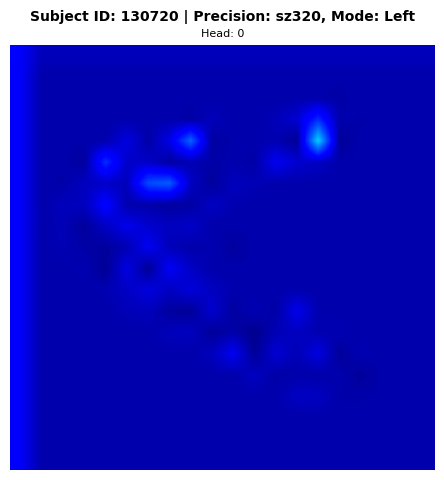

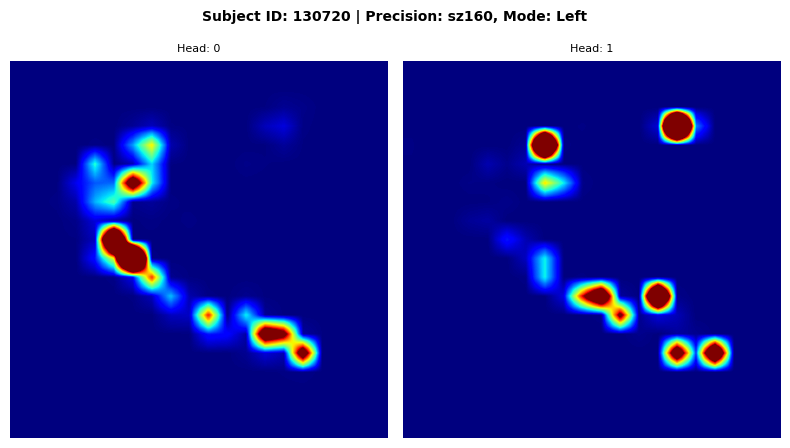

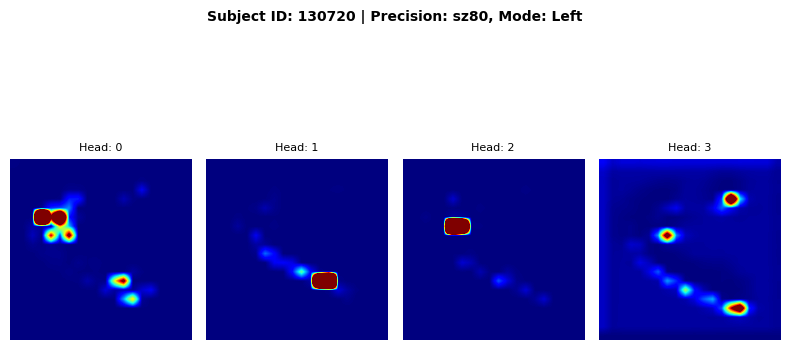

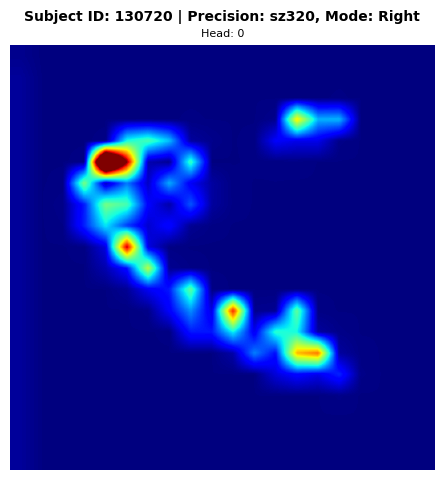

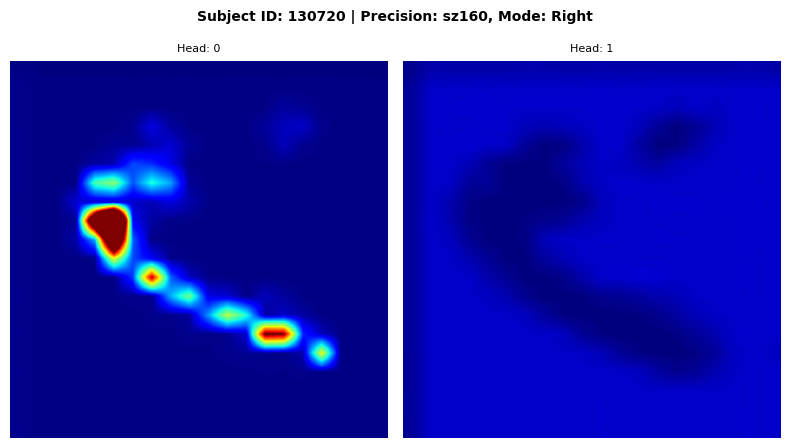

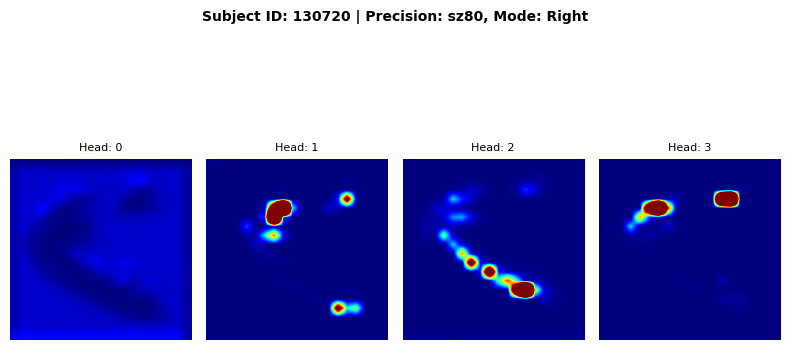

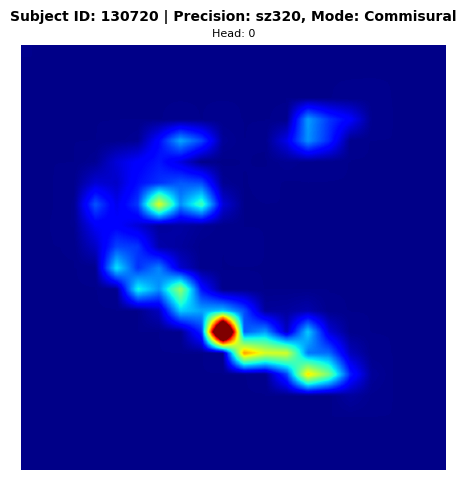

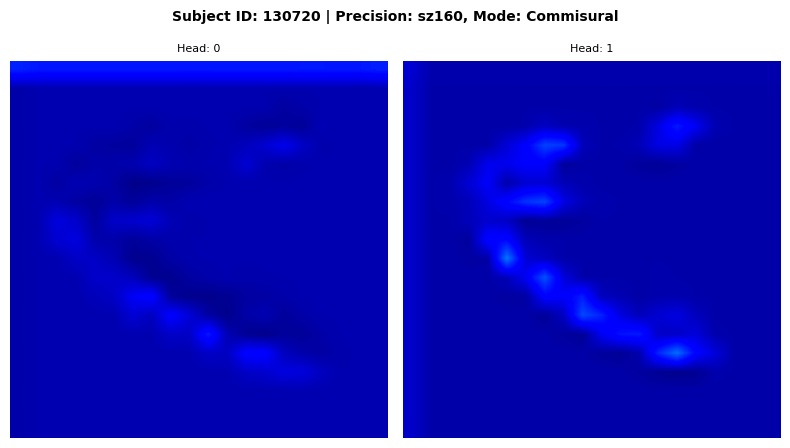

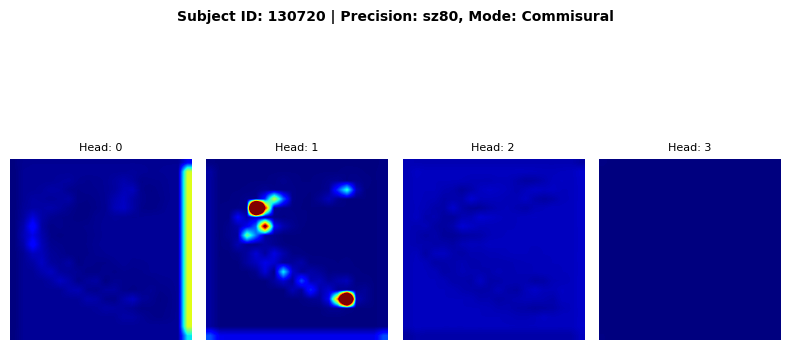

In [5]:
#测试是否能够检测出来train模型的attention
from itertools import product
import pathlib
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import os
precison_list = ['sz80', 'sz160', 'sz320',]
precison_list.reverse()
mode_list = ['Left', 'Right', 'Commisural']

v, i = torch.topk(preds, 1)
labels = labels.cuda()
m = labels == i.squeeze()
print(m)


import h5py

f = h5py.File('/data01/zixi/tractoembedding_PPMI_143/130720/tracts/130720.h5', "r")
tract_list = f['tract_list'][:]
tract_name = f['tract_name'][:]
print(len(np.unique(tract_name)))

# ✅ 只加这一行，假设你有 sub_ids 变量
sub_id = sub_ids[0].item() if torch.is_tensor(sub_ids[0]) else sub_ids[0]
os.makedirs("./attns", exist_ok=True)
for mi, pi in product(range(3), range(3)):
    attns = model.model_list[mi].blocks[2*pi].attn.attn_lst[m, :, 0, 1:].mean(0, keepdim=True)
    B, nH, nP = attns.shape
    fig = plt.figure(figsize=(8, 5))
    for head in range(nH):
        attn = attns[0, head].reshape(-1, 20, 20).cpu()
        mask = F.resize(attn, input_images[0][0][0].shape[-2:], F.InterpolationMode.BILINEAR)
        # 保存为 .npy 文件
        npy_path = f'./attns/{sub_id}_precision_{precison_list[pi]}_mode_{mode_list[mi]}_head{head}.npy'
        np.save(npy_path, mask.numpy())
        
        embed_feat = np.load('/data01/zixi/tractoembedding_PPMI_143/130720/embed_feat.npy')
        embed = np.load('/data01/zixi/tractoembedding_PPMI_143/130720/embed.npy')
        
        print(embed.shape, embed_feat.shape)

        true_x, true_y = np.where(mask[0] > 0.05)
        indice = true_x + true_y * mask.shape[-1]
        
        fiber_indices = np.load('/data01/zixi/tractoembedding_PPMI_143/130720/tractoembedding/da-full/fiber_indices.npy')
        true_fiber_indices = fiber_indices[indice]
        
        print(np.unique(tract_name[tract_list[true_fiber_indices].astype(int)]))
        
        print("pi", pi, "block", 2*pi, "attn shape", model.model_list[mi].blocks[2*pi].attn.attn_lst.shape)


        ax = plt.subplot(1, nH, head + 1, frameon=False)
        ax.imshow(mask[0], vmin=0, vmax=0.05, cmap='jet')
        ax.axis('off')
        ax.set_title(f'Head: {head}', fontsize=8)
    
    # ✅ 在这里标题中加上 ID
    fig.suptitle(
        f'Subject ID: {sub_id} | Precision: {precison_list[pi]}, Mode: {mode_list[mi]}',
        fontsize=10, fontweight='bold', y=0.95
    )
    
    fig.tight_layout()
    pathlib.Path('./attns').mkdir(exist_ok=True)
    fig.savefig(f'./attns/precision_{precison_list[pi]}_mode_{mode_list[mi]}.png', dpi=300)

In [14]:
# 尝试圈出来比较重要的区域：
# 并使用不同的颜色来代表不同的区域
# left=蓝，right=绿，commisural=红
# 结果保存在 ./attns 目录下（会自动创建）
from itertools import product
import os
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy import ndimage as ndi

precison_list = ['sz80', 'sz160', 'sz320']
precison_list.reverse()
mode_list = ['Left', 'Right', 'Commissural']

# -------------------------------------------------
# 1) 取 top-1 预测，并选出预测正确的样本 mask m
# -------------------------------------------------
v, i = torch.topk(preds, 1)  # i: [B,1]
labels = labels.cuda().view(-1)          # 保证 [B]
m = labels == i.squeeze(1)               # [B]
print("Correct mask m:", m)

# -------------------------------------------------
# 2) tract 信息（你这里写死 130720，我保留不动）
# -------------------------------------------------
f = h5py.File('/data01/zixi/tractoembedding_PPMI_143/130720/tracts/130720.h5', "r")
tract_list = f['tract_list'][:]
tract_name = f['tract_name'][:]
print("Unique tract names:", len(np.unique(tract_name)))

# ✅ 当前 batch sub_id
sub_id = sub_ids[0].item() if torch.is_tensor(sub_ids[0]) else sub_ids[0]
print("Current subject id:", sub_id)

# ✅ 输出目录（确保存在）
out_attn_dir = "./attns"
os.makedirs(out_attn_dir, exist_ok=True)

# ======== 圈区域控制参数 ========
TOPK_COMPONENTS = 2
MIN_AREA = 80
MIN_RATIO = 0.08

# ============================================================
# ✅ 关键修改：三个脑区使用各自的 percentile（不再共用一个阈值）
# - hot：用于你原来的 tract 打印（相对松一点）
# - core：用于圈圈（相对严格一点）
# - fallback：core 太小/为空时兜底
# 你只需要改这里即可
# ============================================================
MODE_P = {
    "Left":       {"hot": 97.0, "core": 99.5, "fallback": 97.0},
    "Right":      {"hot": 97.0, "core": 99.5, "fallback": 97.0},
    "Commissural": {"hot": 95.0, "core": 95.0, "fallback": 95.0},
}
# ============================================================

min_valid = 50

# ======== 二次兜底（防止 core 为空/太小）========
EPS = 1e-12
MIN_CORE_PIXELS = 20      # core像素少于这个就触发兜底（可调 10~100）

# ======== 颜色 ========
MODE_COLOR = {
    'Left': 'blue',
    'Right': 'green',
    'Commissural': 'red'
}

def percentile_thr(attn2d: np.ndarray, p: float, min_valid: int = 50):
    """对 attn2d 求分位阈值：优先用 >0 的 valid，否则用全图"""
    valid = attn2d[attn2d > 0]
    if valid.size >= min_valid:
        return float(np.percentile(valid, p)), int(valid.size)
    else:
        return float(np.percentile(attn2d, p)), int(valid.size)

def largest_components_mask(binary_mask: np.ndarray, topk=2, min_area=80, min_ratio=0.08):
    lab, ncc = ndi.label(binary_mask)
    if ncc == 0:
        return np.zeros_like(binary_mask, dtype=bool)

    total = int(binary_mask.sum())
    comps = []
    for cc in range(1, ncc + 1):
        m = (lab == cc)
        area = int(m.sum())
        if area < min_area:
            continue
        if total > 0 and (area / total) < min_ratio:
            continue
        comps.append((area, m))

    if not comps:
        return np.zeros_like(binary_mask, dtype=bool)

    # 仍然按面积挑最大TOPK（保持你原来的逻辑）
    comps.sort(key=lambda x: -x[0])
    out = np.zeros_like(binary_mask, dtype=bool)
    for _, m in comps[:topk]:
        out |= m
    return out

def build_hot(attn2d: np.ndarray, p_hot: float):
    T, valid_n = percentile_thr(attn2d, p_hot, min_valid=min_valid)
    hot = attn2d > T
    return hot, T, valid_n

def build_core_with_fallback(attn2d: np.ndarray, p_core: float, p_fb: float):
    """
    core(圈圈) 的“二次兜底”版本（按各自mode参数）
    - 第一次用 p_core
    - core用 >=(T-eps) 防止边界空
    - 形态学 + 连通域过滤
    - 若 core 太小：降到 p_fb 再来一次
    """
    def _core_at(p):
        T, valid_n = percentile_thr(attn2d, p, min_valid=min_valid)
        core = attn2d >= (T - EPS)            # ✅ 关键：>= + EPS
        core = ndi.binary_closing(core, iterations=1)
        core = ndi.binary_opening(core, iterations=1)
        core = largest_components_mask(core, topk=TOPK_COMPONENTS, min_area=MIN_AREA, min_ratio=MIN_RATIO)
        return core, T, valid_n

    core, T_red, valid_n = _core_at(p_core)

    used_fallback = False
    if core.sum() < MIN_CORE_PIXELS and p_fb < p_core:
        core2, T2, valid_n2 = _core_at(p_fb)
        core, T_red, valid_n = core2, T2, valid_n2
        used_fallback = True

    return core, T_red, valid_n, used_fallback

# -------------------------------------------------
# main loop
# -------------------------------------------------
for mi, pi in product(range(3), range(3)):

    attns = model.model_list[mi].blocks[2 * pi].attn.attn_lst[m, :, 0, 1:].mean(0, keepdim=True)
    _, nH, _ = attns.shape

    fig = plt.figure(figsize=(3 * nH, 4))

    mode_name = mode_list[mi]
    contour_color = MODE_COLOR.get(mode_name, 'white')

    # ✅ 取本 mode 的阈值（hot/core/fallback）
    p_hot = MODE_P[mode_name]["hot"]
    p_core = MODE_P[mode_name]["core"]
    p_fb = MODE_P[mode_name]["fallback"]

    for head in range(nH):

        # (A) 取 20×20 attention -> resize 到输入分辨率（一般是 D×D）
        attn20 = attns[0, head].reshape(-1, 20, 20).cpu()  # [1,20,20]
        mask = F.resize(attn20, input_images[0][0][0].shape[-2:], F.InterpolationMode.BILINEAR)  # [1,H,W]
        attn2d = mask[0].cpu().numpy()  # H×W

        # (B) 保存为 npy（保证目录存在）
        npy_path = os.path.join(out_attn_dir, f'{sub_id}_precision_{precison_list[pi]}_mode_{mode_name}_head{head}.npy')
        np.save(npy_path, attn2d)

        # (C) hot（用于你原来的 tract 打印）——按 mode 自己的 p_hot
        hot, T_hot, valid_n_hot = build_hot(attn2d, p_hot)

        # (D) 你的 fiber 映射逻辑（保持不动，但加安全检查）
        ys, xs = np.where(hot)
        indice = ys + xs * attn2d.shape[-1]  # ⚠️ 仍然保留你原写法

        fiber_path = f'/data01/zixi/tractoembedding_PPMI_143/{sub_id}/tractoembedding/da-full/fiber_indices.npy'
        if os.path.exists(fiber_path):
            fiber_indices = np.load(fiber_path)
            # 防止 indice 越界（理论上不会，但加上更稳）
            indice = indice[(indice >= 0) & (indice < fiber_indices.shape[0])]
            true_fiber_indices = fiber_indices[indice].astype(int)

            try:
                print(f"[hot] mode={mode_name} head={head} P{p_hot} T={T_hot:.6f} valid={valid_n_hot} pix={len(indice)}")
                print("Top tracts in hotspot:",
                      np.unique(tract_name[tract_list[true_fiber_indices].astype(int)]))
            except Exception as e:
                print("[Warn] tract mapping failed:", e)
        else:
            print("[Warn] missing fiber_indices:", fiber_path)

        # (E) 可视化底图
        ax = plt.subplot(1, nH, head + 1, frameon=False)
        ax.imshow(attn2d, vmin=0, vmax=0.05, cmap='jet')
        ax.axis('off')
        ax.set_title(f'{mode_name} | Head: {head}', fontsize=9)

        # (F) core（圈圈）+ 二次兜底 ——按 mode 自己的 p_core / p_fb
        core, T_red, valid_n_core, used_fallback = build_core_with_fallback(attn2d, p_core, p_fb)

        # 画圈圈（core可能为空，空就不画）
        if core.sum() > 0:
            ax.contour(core.astype(float), levels=[0.5], colors=contour_color, linewidths=2.4)

        # 阈值信息标注（标出是否触发 fallback）
        p_used = (p_fb if used_fallback else p_core)
        ax.text(
            2, 12,
            f"mode={mode_name}\n"
            f"hot=P{p_hot}  T={T_hot:.5f}\n"
            f"core=P{p_used}  Tcore={T_red:.5f}\n"
            f"(valid={valid_n_core}, core_pix={int(core.sum())})",
            color="white",
            fontsize=7,
            bbox=dict(facecolor="black", alpha=0.4, pad=1),
        )

    fig.suptitle(
        f'Subject ID: {sub_id} | Precision: {precison_list[pi]} | Mode: {mode_name}',
        fontsize=11, fontweight='bold', y=0.98
    )

    fig.tight_layout()
    out_png = os.path.join(out_attn_dir, f'{sub_id}_precision_{precison_list[pi]}_mode_{mode_name}.png')
    fig.savefig(out_png, dpi=300)
    plt.close(fig)
    print("Saved:", out_png)

f.close()
print("Done. Outputs in:", out_attn_dir)


Correct mask m: tensor([ True,  True, False,  True], device='cuda:0')
Unique tract names: 58
Current subject id: 130720
[hot] mode=Left head=0 P97.0 T=0.005334 valid=102400 pix=2008
Top tracts in hotspot: [b'T_AF_left' b'T_CBLM_left' b'T_CBLM_right' b'T_CC2_comm']
Saved: ./attns/130720_precision_sz320_mode_Left.png
[hot] mode=Left head=0 P97.0 T=0.023984 valid=102400 pix=3072
Top tracts in hotspot: [b'T_CBLM_left' b'T_CBLM_right' b'T_CB_right' b'T_CC1_comm' b'T_CC2_comm'
 b'T_CC3_comm']
[hot] mode=Left head=1 P97.0 T=0.027654 valid=102400 pix=3072
Top tracts in hotspot: [b'T_CBLM_right' b'T_CB_left' b'T_CB_right' b'T_CC1_comm' b'T_CC2_comm'
 b'T_CC3_comm' b'T_CC4_comm']
Saved: ./attns/130720_precision_sz160_mode_Left.png
[hot] mode=Left head=0 P97.0 T=0.021559 valid=102400 pix=3072
Top tracts in hotspot: [b'T_CBLM_left' b'T_CBLM_right' b'T_CB_left' b'T_CB_right' b'T_CC1_comm'
 b'T_CC2_comm']
[hot] mode=Left head=1 P97.0 T=0.004587 valid=102400 pix=3072
Top tracts in hotspot: [b'T_CBLM_

In [8]:
# 用这个生成 left / right / commissural 三个区域的 streamline（每个 mode 用自己的 percentile；不做兜底）
import os
import numpy as np
import pyvista as pv
from scipy import ndimage as ndi
import torch
import torch.nn.functional as tF

# ---------------------------
# paths / params
# ---------------------------
sub_id = "130720"
precision = "sz320"                     # 反推目标 D
modes = ["Left", "Right", "Commissural"]
heads = [0]                             # 你现在只用 head0；要多 head 就写 [0,1]

attn_dir = "/data01/zixi/TractoFormer/TractoFormer-MVIT-main/attns"
embed_path = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}/embed.npy"
vtp_path   = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}/tracts/{sub_id}.vtp"
out_dir = "./circled_streamlines_vtp"
os.makedirs(out_dir, exist_ok=True)

# ✅ 每个脑区用自己的 attention percentile（一次阈值，不兜底）
MODE_PERCENTILE = {
    "Left": 90,
    "Right": 99,
    "Commissural": 99.3,
}

# ===== 形态学/连通域筛选参数 =====
TOPK_COMPONENTS = 2
MIN_AREA = 80
MIN_RATIO = 0.08

# ===== 数值稳定 =====
EPS = 1e-12

# heads 合并方式：union 或 vote
HEAD_FUSION = "union"   # "union" | "vote"
VOTE_K = 2              # vote: 至少K个head都圈中才算圈中（heads=[0,1]时，2=必须都圈中）

# ---------------------------
# helpers
# ---------------------------
D = int(precision.replace("sz", ""))

scale_map = {80: 12.5, 160: 25, 320: 50, 640: 100, 1280: 200}
assert D in scale_map, f"Unsupported D={D}, extend scale_map if needed."
scale = scale_map[D]
offset = D / 2 - D / 10

def resize_attn_to(attn2d: np.ndarray, target_hw):
    """确保插值输入是 2D（避免 1xHxW 的维度错误）"""
    a = attn2d
    if a.ndim == 3:
        a = np.squeeze(a)
    if a.ndim != 2:
        raise ValueError(f"resize_attn_to expects 2D, got {attn2d.shape} -> {a.shape}")
    Ht, Wt = target_hw
    x = torch.from_numpy(a).float()[None, None, ...]  # (1,1,H,W)
    x = tF.interpolate(x, size=(Ht, Wt), mode="bilinear", align_corners=False)
    return x[0, 0].cpu().numpy()

def largest_components_mask(binary_mask: np.ndarray, topk=2, min_area=80, min_ratio=0.08):
    lab, ncc = ndi.label(binary_mask)
    if ncc == 0:
        return np.zeros_like(binary_mask, dtype=bool)

    total = int(binary_mask.sum())
    comps = []
    for cc in range(1, ncc + 1):
        m = (lab == cc)
        area = int(m.sum())
        if area < min_area:
            continue
        if total > 0 and (area / total) < min_ratio:
            continue
        comps.append((area, m))

    if not comps:
        return np.zeros_like(binary_mask, dtype=bool)

    comps.sort(key=lambda x: -x[0])
    out = np.zeros_like(binary_mask, dtype=bool)
    for _, m in comps[:topk]:
        out |= m
    return out

def attn_to_circled_core(attn2d: np.ndarray, p: float):
    """
    ✅ 一次阈值版本：
    - core = attn >= P(p)（>= + EPS 防止边界空）
    - closing/opening
    - 连通域过滤取 TOPK_COMPONENTS
    """
    valid = attn2d[attn2d > 0]
    if valid.size > 0:
        T = np.percentile(valid, p)
    else:
        T = np.percentile(attn2d, p)

    core = attn2d >= (T - EPS)
    core = ndi.binary_closing(core, iterations=1)
    core = ndi.binary_opening(core, iterations=1)
    core = largest_components_mask(core, topk=TOPK_COMPONENTS, min_area=MIN_AREA, min_ratio=MIN_RATIO)
    return core, float(T)

# ---------------------------
# load embedding + vtp
# ---------------------------
embed = np.load(embed_path)   # (N,2)
mesh = pv.read(vtp_path)
N = embed.shape[0]
assert mesh.n_cells == N, f"VTP cells {mesh.n_cells} != embed N {N}"

# embedding_imaging.py 的 pixel 映射（反推用）
dx = np.round(embed[:, 0] * scale + offset).astype(int)
dy = np.round(embed[:, 1] * scale + offset).astype(int)
dx = np.clip(dx, 0, D - 1)
dy = np.clip(dy, 0, D - 1)

# ---------------------------
# per mode: merge heads' circled core -> select streamlines -> save vtp
# ---------------------------
for mode in modes:
    p = float(MODE_PERCENTILE.get(mode, 97.0))

    core_list = []
    used = 0

    for head in heads:
        attn_path = f"{attn_dir}/{sub_id}_precision_{precision}_mode_{mode}_head{head}.npy"
        if not os.path.exists(attn_path):
            print("[skip missing]", attn_path)
            continue

        attn = np.load(attn_path)
        if attn.ndim == 3:
            attn = np.squeeze(attn)

        # 统一到 (D,D)
        if attn.shape != (D, D):
            print(f"[resize] {mode} head{head}: {attn.shape} -> {(D, D)}")
            attn = resize_attn_to(attn, (D, D))

        core, T = attn_to_circled_core(attn, p=p)
        core_list.append(core)
        used += 1
        print(f"[core] {mode} head{head} P{p} T={T:.6f} core_pixels={int(core.sum())}")

    if used == 0:
        print(f"[warn] no heads found for mode={mode}")
        continue

    # 合并所有 head 的 core
    core_stack = np.stack(core_list, axis=0)
    if HEAD_FUSION == "union":
        core_final = np.any(core_stack, axis=0)
    elif HEAD_FUSION == "vote":
        core_final = (np.sum(core_stack, axis=0) >= VOTE_K)
    else:
        raise ValueError("HEAD_FUSION must be 'union' or 'vote'")

    # 再清理一次
    core_final = ndi.binary_closing(core_final, iterations=1)
    core_final = ndi.binary_opening(core_final, iterations=1)
    core_final = largest_components_mask(core_final, topk=TOPK_COMPONENTS, min_area=MIN_AREA, min_ratio=MIN_RATIO)

    # 用圈圈区域筛选 streamline
    mask = core_final[dx, dy]          # (N,)
    ids = np.where(mask)[0]
    print(f"[{mode}] selected streamlines from circled core: {ids.size}")

    if ids.size == 0:
        print(f"[warn] empty for {mode}. Try lower MODE_PERCENTILE[{mode}] or relax MIN_AREA/MIN_RATIO.")
        continue

    sub = mesh.extract_cells(ids)
    out_vtk = f"{out_dir}/{sub_id}_{precision}_{mode}_circledHeads_{HEAD_FUSION}.vtk"
    sub.save(out_vtk)
    print("saved:", out_vtk)

print("Done. out_dir:", out_dir)


[core] Left head0 P90.0 T=0.003714 core_pixels=5805
[Left] selected streamlines from circled core: 6651
saved: ./circled_streamlines_vtp/130720_sz320_Left_circledHeads_union.vtk
[core] Right head0 P99.0 T=0.029308 core_pixels=789
[Right] selected streamlines from circled core: 10254
saved: ./circled_streamlines_vtp/130720_sz320_Right_circledHeads_union.vtk
[core] Commissural head0 P99.3 T=0.028205 core_pixels=654
[Commissural] selected streamlines from circled core: 12184
saved: ./circled_streamlines_vtp/130720_sz320_Commissural_circledHeads_union.vtk
Done. out_dir: ./circled_streamlines_vtp


In [ ]:

# 用这个生成 left / right / commissural 三个区域的 streamline（每个 mode 用自己的 percentile；不做兜底）
import os
import numpy as np
import pyvista as pv
from scipy import ndimage as ndi
import torch
import torch.nn.functional as tF

# ---------------------------
# paths / params
# ---------------------------
sub_id = "130720"
precision = "sz320"                     # 反推目标 D
modes = ["Left", "Right", "Commissural"]
heads = [0]                             # 你现在只用 head0；要多 head 就写 [0,1]

attn_dir = "/data01/zixi/TractoFormer/TractoFormer-MVIT-main/attns"
embed_path = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}/embed.npy"
vtp_path   = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}/tracts/{sub_id}.vtp"
out_dir = "./circled_streamlines_vtp"
os.makedirs(out_dir, exist_ok=True)

# ✅ 每个脑区用自己的 attention percentile（一次阈值，不兜底）
MODE_PERCENTILE = {
    "Left": 90,
    "Right": 99.9,
    "Commissural": 99.91,
}

# ===== 形态学/连通域筛选参数 =====
TOPK_COMPONENTS = 1
MIN_AREA = 80
MIN_RATIO = 0.08

# ===== 数值稳定 =====
EPS = 1e-12

# heads 合并方式：union 或 vote
HEAD_FUSION = "union"   # "union" | "vote"
VOTE_K = 2              # vote: 至少K个head都圈中才算圈中（heads=[0,1]时，2=必须都圈中）

# ---------------------------
# helpers
# ---------------------------
D = int(precision.replace("sz", ""))

scale_map = {80: 12.5, 160: 25, 320: 50, 640: 100, 1280: 200}
assert D in scale_map, f"Unsupported D={D}, extend scale_map if needed."
scale = scale_map[D]
offset = D / 2 - D / 10

def resize_attn_to(attn2d: np.ndarray, target_hw):
    """确保插值输入是 2D（避免 1xHxW 的维度错误）"""
    a = attn2d
    if a.ndim == 3:
        a = np.squeeze(a)
    if a.ndim != 2:
        raise ValueError(f"resize_attn_to expects 2D, got {attn2d.shape} -> {a.shape}")
    Ht, Wt = target_hw
    x = torch.from_numpy(a).float()[None, None, ...]  # (1,1,H,W)
    x = tF.interpolate(x, size=(Ht, Wt), mode="bilinear", align_corners=False)
    return x[0, 0].cpu().numpy()

def largest_components_mask(binary_mask: np.ndarray, topk=2, min_area=80, min_ratio=0.08):
    lab, ncc = ndi.label(binary_mask)
    if ncc == 0:
        return np.zeros_like(binary_mask, dtype=bool)

    total = int(binary_mask.sum())
    comps = []
    for cc in range(1, ncc + 1):
        m = (lab == cc)
        area = int(m.sum())
        if area < min_area:
            continue
        if total > 0 and (area / total) < min_ratio:
            continue
        comps.append((area, m))

    if not comps:
        return np.zeros_like(binary_mask, dtype=bool)

    comps.sort(key=lambda x: -x[0])
    out = np.zeros_like(binary_mask, dtype=bool)
    for _, m in comps[:topk]:
        out |= m
    return out

def attn_to_circled_core(attn2d: np.ndarray, p: float):
    """
    ✅ 一次阈值版本：
    - core = attn >= P(p)（>= + EPS 防止边界空）
    - closing/opening
    - 连通域过滤取 TOPK_COMPONENTS
    """
    valid = attn2d[attn2d > 0]
    if valid.size > 0:
        T = np.percentile(valid, p)
    else:
        T = np.percentile(attn2d, p)

    core = attn2d >= (T - EPS)
    core = ndi.binary_closing(core, iterations=1)
    core = ndi.binary_opening(core, iterations=1)
    core = largest_components_mask(core, topk=TOPK_COMPONENTS, min_area=MIN_AREA, min_ratio=MIN_RATIO)
    return core, float(T)

# ---------------------------
# load embedding + vtp
# ---------------------------
embed = np.load(embed_path)   # (N,2)
mesh = pv.read(vtp_path)
N = embed.shape[0]
assert mesh.n_cells == N, f"VTP cells {mesh.n_cells} != embed N {N}"

# embedding_imaging.py 的 pixel 映射（反推用）
dx = np.round(embed[:, 0] * scale + offset).astype(int)
dy = np.round(embed[:, 1] * scale + offset).astype(int)
dx = np.clip(dx, 0, D - 1)
dy = np.clip(dy, 0, D - 1)

# ---------------------------
# per mode: merge heads' circled core -> select streamlines -> save vtp
# ---------------------------
for mode in modes:
    p = float(MODE_PERCENTILE.get(mode, 97.0))

    core_list = []
    used = 0

    for head in heads:
        attn_path = f"{attn_dir}/{sub_id}_precision_{precision}_mode_{mode}_head{head}.npy"
        if not os.path.exists(attn_path):
            print("[skip missing]", attn_path)
            continue

        attn = np.load(attn_path)
        if attn.ndim == 3:
            attn = np.squeeze(attn)

        # 统一到 (D,D)
        if attn.shape != (D, D):
            print(f"[resize] {mode} head{head}: {attn.shape} -> {(D, D)}")
            attn = resize_attn_to(attn, (D, D))

        core, T = attn_to_circled_core(attn, p=p)
        core_list.append(core)
        used += 1
        print(f"[core] {mode} head{head} P{p} T={T:.6f} core_pixels={int(core.sum())}")

    if used == 0:
        print(f"[warn] no heads found for mode={mode}")
        continue

    # 合并所有 head 的 core
    core_stack = np.stack(core_list, axis=0)
    if HEAD_FUSION == "union":
        core_final = np.any(core_stack, axis=0)
    elif HEAD_FUSION == "vote":
        core_final = (np.sum(core_stack, axis=0) >= VOTE_K)
    else:
        raise ValueError("HEAD_FUSION must be 'union' or 'vote'")

    # 再清理一次
    core_final = ndi.binary_closing(core_final, iterations=1)
    core_final = ndi.binary_opening(core_final, iterations=1)
    core_final = largest_components_mask(core_final, topk=TOPK_COMPONENTS, min_area=MIN_AREA, min_ratio=MIN_RATIO)

    # 用圈圈区域筛选 streamline
    mask = core_final[dx, dy]          # (N,)
    ids = np.where(mask)[0]
    print(f"[{mode}] selected streamlines from circled core: {ids.size}")

    if ids.size == 0:
        print(f"[warn] empty for {mode}. Try lower MODE_PERCENTILE[{mode}] or relax MIN_AREA/MIN_RATIO.")
        continue

    sub = mesh.extract_cells(ids)
    out_vtk = f"{out_dir}/{sub_id}_{precision}_{mode}_circledHeads_{HEAD_FUSION}.vtk"
    sub.save(out_vtk)
    print("saved:", out_vtk)

print("Done. out_dir:", out_dir)

[core] Left head0 P90.0 T=0.003714 core_pixels=4793
[Left] selected streamlines from circled core: 1026
saved: ./circled_streamlines_vtp/130720_sz320_Left_circledHeads_union.vtk
[core] Right head0 P99.7 T=0.044067 core_pixels=304
[Right] selected streamlines from circled core: 4394
saved: ./circled_streamlines_vtp/130720_sz320_Right_circledHeads_union.vtk
[core] Commissural head0 P99.91 T=0.055412 core_pixels=93
[Commissural] selected streamlines from circled core: 1986
saved: ./circled_streamlines_vtp/130720_sz320_Commissural_circledHeads_union.vtk
Done. out_dir: ./circled_streamlines_vtp


In [ ]:
#叠加结果到embedding的脑图上
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as tF
from scipy import ndimage as ndi

sub_id = "130720"
nii_path = "/data01/zixi/tractoembedding_PPMI_143/130720/tractoembedding/da-full/130720-FA1_CLR_sz320.nii.gz"
attn_dir = "/data01/zixi/TractoFormer/TractoFormer-MVIT-main/attns"

modes = ["Left", "Right", "Commissural"]
heads = [0, 1]
precision = "sz320"

out_dir = "./overlays_coreOnly"
os.makedirs(out_dir, exist_ok=True)

# --------------------------
# ✅ core 阈值：每个脑区一个（一般要比 hot 更高）
# 你可以按需要调高/调低
MODE_CORE_PERCENTILE = {
    "Left": 96,
    "Right": 98,
    "Commissural": 95,   # commissural 往往弱一点，稍微放松
}

# 是否在底图上叠加 “core 区域的热图”
SHOW_CORE_HEATMAP = True
ATTN_ALPHA = 0.70

# core 连通域筛选参数
TOPK_COMPONENTS = 1
MIN_AREA = 30        # core 很小，MIN_AREA 别设太大（否则容易空）
MIN_RATIO = 0.00     # core 可能非常小，ratio 直接放开

HEAD_FUSION = "union"     # "union" | "vote"
VOTE_K = 2

# 显示相关
EMBED_CMAP = "gray"
ATTN_CMAP = "jet"
BRAIN_GAMMA = 0.55
EPS = 1e-12

# ✅ 连通域优先策略：选“更亮”的区域
COMPONENT_SCORE = "mean"   # "mean" | "max" | "mean_x_area"

# ✅ 颜色与线型（虚线）
MODE_CONTOUR_STYLE = {
    "Left":        dict(color="blue",  linestyle="--", linewidth=4.3),
    "Right":       dict(color="green", linestyle="--", linewidth=0.3),
    "Commissural": dict(color="red",   linestyle="--", linewidth=0.3),
}

def normalize_brain_on_black(x: np.ndarray, eps: float = 1e-8, gamma: float = 0.55) -> np.ndarray:
    x = x.astype(np.float32)
    mask = x > 0
    out = np.zeros_like(x, dtype=np.float32)
    if mask.sum() == 0:
        return out
    vals = x[mask]
    lo, hi = np.percentile(vals, 1), np.percentile(vals, 99)
    if hi - lo < eps:
        lo, hi = vals.min(), vals.max() + eps
    out[mask] = np.clip((x[mask] - lo) / (hi - lo + eps), 0, 1)
    out[mask] = np.power(out[mask], gamma)
    return out

def resize_to(attn2d: np.ndarray, target_hw) -> np.ndarray:
    Ht, Wt = target_hw
    a = attn2d
    if a.ndim == 3:
        a = np.squeeze(a)
    if a.ndim != 2:
        raise ValueError(f"resize_to expects 2D, got {attn2d.shape} -> {a.shape}")
    x = torch.from_numpy(a).float()[None, None, ...]
    x = tF.interpolate(x, size=(Ht, Wt), mode="bilinear", align_corners=False)
    return x[0, 0].cpu().numpy()

def load_nii_as_3channels(path: str):
    img = nib.load(path)
    data = img.get_fdata()
    print("[nii] raw shape:", data.shape, "dtype:", data.dtype)
    if data.ndim == 3 and data.shape[-1] == 3:
        return data
    if data.ndim == 3 and data.shape[0] == 3:
        return np.transpose(data, (1, 2, 0))
    if data.ndim == 4 and data.shape[-1] == 3:
        z = data.shape[2] // 2
        print("[nii] using middle slice z =", z)
        return data[:, :, z, :]
    if data.ndim == 4 and data.shape[0] == 3:
        z = data.shape[-1] // 2
        print("[nii] using middle slice z =", z)
        base = data[:, :, :, z]
        return np.transpose(base, (1, 2, 0))
    raise ValueError(f"Unsupported nii shape: {data.shape}")

def select_components_by_attn(binary_mask: np.ndarray,
                              attn2d: np.ndarray,
                              topk: int = 1,
                              min_area: int = 30,
                              min_ratio: float = 0.0,
                              score_mode: str = "mean") -> np.ndarray:
    lab, ncc = ndi.label(binary_mask)
    if ncc == 0:
        return np.zeros_like(binary_mask, dtype=bool)

    total = int(binary_mask.sum())
    comps = []
    for cc in range(1, ncc + 1):
        m = (lab == cc)
        area = int(m.sum())
        if area < min_area:
            continue
        if total > 0 and (area / total) < min_ratio:
            continue
        vals = attn2d[m]
        vals = vals[np.isfinite(vals)]
        if vals.size == 0:
            continue
        if score_mode == "mean":
            score = float(vals.mean())
        elif score_mode == "max":
            score = float(vals.max())
        elif score_mode == "mean_x_area":
            score = float(vals.mean() * area)
        else:
            raise ValueError("score_mode must be 'mean', 'max', or 'mean_x_area'")
        comps.append((score, area, m))

    if not comps:
        return np.zeros_like(binary_mask, dtype=bool)

    comps.sort(key=lambda x: (-x[0], -x[1]))
    out = np.zeros_like(binary_mask, dtype=bool)
    for _, _, m in comps[:topk]:
        out |= m
    return out

def core_from_percentile(attn2d: np.ndarray, brain_mask: np.ndarray, percentile: float):
    valid = attn2d[(attn2d > 0) & brain_mask & np.isfinite(attn2d)]
    if valid.size > 0:
        T = np.percentile(valid, percentile)
    else:
        T = np.percentile(attn2d[np.isfinite(attn2d)], percentile)

    core = attn2d >= (T - EPS)
    core = core & brain_mask

    # 轻微形态学清理（core 小，不要太重）
    core = ndi.binary_opening(core, iterations=1)
    core = ndi.binary_closing(core, iterations=1)

    # ✅ 连通域按 attention 强度选最亮的那块
    core = select_components_by_attn(
        core, attn2d,
        topk=TOPK_COMPONENTS,
        min_area=MIN_AREA,
        min_ratio=MIN_RATIO,
        score_mode=COMPONENT_SCORE
    )
    core = core & brain_mask
    return core, float(T)

def save_base(base2d: np.ndarray, out_path: str, title: str):
    base_n = normalize_brain_on_black(base2d, gamma=BRAIN_GAMMA)
    fig = plt.figure(figsize=(5, 5), facecolor="black")
    ax = fig.add_subplot(111)
    ax.set_facecolor("black")
    ax.imshow(base_n, cmap=EMBED_CMAP, vmin=0, vmax=1)
    ax.axis("off")
    ax.set_title(title, fontsize=12, color="white", pad=6)
    fig.savefig(out_path, dpi=300, bbox_inches="tight", pad_inches=0, facecolor="black")
    plt.close(fig)

def overlay_core_only(base2d, attn_avg, core_final, out_path, title, p_core, contour_color, contour_linestyle):
    base_n = normalize_brain_on_black(base2d, gamma=BRAIN_GAMMA)

    fig = plt.figure(figsize=(5, 5), facecolor="black")
    ax = fig.add_subplot(111)
    ax.set_facecolor("black")
    ax.imshow(base_n, cmap=EMBED_CMAP, vmin=0, vmax=1)

    if SHOW_CORE_HEATMAP:
        attn_show = attn_avg.copy().astype(np.float32)
        attn_show[~core_final] = np.nan
        vmax = np.nanpercentile(attn_avg, 99.9)
        vmin = np.nanpercentile(attn_avg, p_core)
        if (not np.isfinite(vmin)) or (not np.isfinite(vmax)) or (vmin >= vmax):
            vmin = np.nanmin(attn_avg)
            vmax = np.nanmax(attn_avg)
        ax.imshow(attn_show, cmap=ATTN_CMAP, alpha=ATTN_ALPHA, vmin=vmin, vmax=vmax)

    # ✅ 只圈 core（虚线彩色）
    if core_final.sum() > 0:
        ax.contour(
            core_final.astype(float),
            levels=[0.5],
            colors=contour_color,
            linewidths=1.6,
            linestyles=contour_linestyle,
        )

    ax.axis("off")
    ax.set_title(title, fontsize=12, color="white", pad=6)

    fig.savefig(out_path, dpi=300, bbox_inches="tight", pad_inches=0, facecolor="black")
    plt.close(fig)


# -------------------------
# 1) 读 nii 并拆三通道
# -------------------------
base_3c = load_nii_as_3channels(nii_path)
H, W, C = base_3c.shape
assert C == 3

# ⚠️ 按你现在的“语义纠正”
mode_to_ch = {"Commissural": 0, "Left": 1, "Right": 2}

# 保存底图
for mode in modes:
    base2d = base_3c[:, :, mode_to_ch[mode]]
    out_base = os.path.join(out_dir, f"{sub_id}_{precision}_{mode}_base.png")
    save_base(base2d, out_base, f"{mode}")
    print("[saved base]", out_base)

# -------------------------
# 2) 每个 mode：融合多个 head -> 只输出 core 的圈
# -------------------------
for mode in modes:
    base2d = base_3c[:, :, mode_to_ch[mode]]
    brain_mask = base2d > 0

    core_list = []
    attn_list = []

    p_core = float(MODE_CORE_PERCENTILE[mode])

    for head in heads:
        attn_path = os.path.join(attn_dir, f"{sub_id}_precision_{precision}_mode_{mode}_head{head}.npy")
        if not os.path.exists(attn_path):
            print("[skip] missing attn:", attn_path)
            continue

        attn2d = np.load(attn_path)
        if attn2d.ndim == 3:
            attn2d = np.squeeze(attn2d)

        if attn2d.shape != base2d.shape:
            print(f"[resize] {mode} head{head}: attn {attn2d.shape} -> base {base2d.shape}")
            attn2d = resize_to(attn2d, base2d.shape)

        attn2d = attn2d.copy()
        attn2d[~brain_mask] = 0.0

        core, T = core_from_percentile(attn2d, brain_mask, p_core)

        core_list.append(core)
        attn_list.append(attn2d)
        print(f"[core] {mode} head{head} P{p_core} (T={T:.6f}) core_pixels={int(core.sum())}")

    if len(attn_list) == 0:
        print("[warn] no attention found for mode:", mode)
        continue

    attn_avg = np.mean(np.stack(attn_list, axis=0), axis=0)
    attn_avg = attn_avg.copy()
    attn_avg[~brain_mask] = np.nan

    core_stack = np.stack(core_list, axis=0)
    if HEAD_FUSION == "union":
        core_final = np.any(core_stack, axis=0)
    elif HEAD_FUSION == "vote":
        core_final = (np.sum(core_stack, axis=0) >= VOTE_K)
    else:
        raise ValueError("HEAD_FUSION must be 'union' or 'vote'")

    # 最后再清理一次（轻）
    core_final = ndi.binary_opening(core_final, iterations=1)
    core_final = ndi.binary_closing(core_final, iterations=1)
    core_final = select_components_by_attn(
        core_final, np.nan_to_num(attn_avg, nan=0.0),
        topk=TOPK_COMPONENTS,
        min_area=MIN_AREA,
        min_ratio=MIN_RATIO,
        score_mode=COMPONENT_SCORE
    )
    core_final = core_final & brain_mask

    style = MODE_CONTOUR_STYLE[mode]
    out_png = os.path.join(out_dir, f"{sub_id}_{precision}_{mode}_coreOnly_overlay.png")
    overlay_core_only(
        base2d, attn_avg, core_final,
        out_png, f"{mode} (core P{p_core})", p_core,
        contour_color=style["color"], contour_linestyle=style["linestyle"]
    )
    print("[saved core overlay]", out_png, "core_pixels=", int(core_final.sum()))

print("Done. Outputs in:", out_dir)


[nii] raw shape: (320, 320, 3) dtype: float64


[saved base] ./overlays_coreOnly/130720_sz320_Left_base.png
[saved base] ./overlays_coreOnly/130720_sz320_Right_base.png
[saved base] ./overlays_coreOnly/130720_sz320_Commissural_base.png
[core] Left head0 P96.0 (T=0.005711) core_pixels=521
[skip] missing attn: /data01/zixi/TractoFormer/TractoFormer-MVIT-main/attns/130720_precision_sz320_mode_Left_head1.npy
[saved core overlay] ./overlays_coreOnly/130720_sz320_Left_coreOnly_overlay.png core_pixels= 521
[core] Right head0 P98.0 (T=0.033961) core_pixels=481
[skip] missing attn: /data01/zixi/TractoFormer/TractoFormer-MVIT-main/attns/130720_precision_sz320_mode_Right_head1.npy
[saved core overlay] ./overlays_coreOnly/130720_sz320_Right_coreOnly_overlay.png core_pixels= 481
[core] Commissural head0 P95.0 (T=0.029429) core_pixels=377
[skip] missing attn: /data01/zixi/TractoFormer/TractoFormer-MVIT-main/attns/130720_precision_sz320_mode_Commissural_head1.npy
[saved core overlay] ./overlays_coreOnly/130720_sz320_Commissural_coreOnly_overlay.pn

In [20]:
from itertools import product
import os
import pathlib
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import functional as TVF

# =========================
# 配置
# =========================
precision_list = ["sz80", "sz160", "sz320"]
precision_list.reverse()  # -> ["sz320","sz160","sz80"] 和你一致
mode_list = ["Left", "Right", "Commisural"]
D_map = {"sz80": 80, "sz160": 160, "sz320": 320}

OUT_DIR = pathlib.Path("./attns_extract")
OUT_DIR.mkdir(exist_ok=True)

# =========================
# 1) 计算 m（预测正确的样本 mask）
# =========================
v, top1 = torch.topk(preds, 1)              # preds 必须是 [B, num_cls] 或 [B,1] 类似
labels_cuda = labels.cuda() if not labels.is_cuda else labels
m = (labels_cuda == top1.squeeze())

print("[DEBUG] m(correct mask) =", m.detach().cpu().numpy().astype(int))
if m.sum().item() == 0:
    print("⚠️ 警告：这个 batch 没有预测正确的样本。你用 m 做 mean 会得到 NaN/报错。建议先换一个 batch，或改成用 sample_idx 单样本。")

# =========================
# 2) sub_id（就按你：取 batch 第一个）
# =========================
sub_id = sub_ids[0].item() if torch.is_tensor(sub_ids[0]) else sub_ids[0]
print("[DEBUG] sub_id =", sub_id)

# =========================
# 3) 核心：提取 attention 并保存
# =========================
def extract_and_save_attn(
    model,
    m_mask,
    sub_id,
    input_images,
    out_dir: pathlib.Path,
    thr_value: float = 0.05,   # 你原来用的阈值（只用于可视化）
):
    """
    完全照你原逻辑提取 attention:
      attns = attn_lst[m, :, 0, 1:].mean(0, keepdim=True)
    并保存 20x20 和 resize 后的 D×D
    """
    for mi, pi in product(range(3), range(3)):
        prec = precision_list[pi]
        D = D_map[prec]
        mode_name = mode_list[mi]

        attn_block = model.model_list[mi].blocks[2 * pi].attn

        # ---- debug: attn_lst 是否存在 ----
        if (not hasattr(attn_block, "attn_lst")) or (attn_block.attn_lst is None):
            raise RuntimeError(
                f"[ERROR] MI={mi} PI={pi} ({mode_name},{prec}) 的 attn_lst 不存在/为 None。\n"
                f"你需要先成功 forward 一次 model(...)，并且 forward 过程中走到了该 block 的 attention。"
            )

        # attn_lst: [B, heads, Nq, Nk]
        A = attn_block.attn_lst
        # 你原逻辑：只取 CLS(query=0)->patch(key=1:)
        # 然后对 m 的样本求 mean
        if m_mask.sum().item() == 0:
            raise RuntimeError(
                "m_mask 全 False：无法执行 attn_lst[m,...].mean()。\n"
                "请换一个 batch，或改成使用 sample_idx 精确取单个样本。"
            )

        attns = A[m_mask, :, 0, 1:].mean(0, keepdim=True)  # [1, heads, 400]
        B1, nH, nP = attns.shape
        if nP != 400:
            raise RuntimeError(f"[ERROR] patch 数不是 400，而是 {nP}，需要按你的 token 结构适配。")

        # -------- 可视化：每个 head 一张 --------
        fig = plt.figure(figsize=(2.2 * nH, 3.2))

        for head in range(nH):
            att20 = attns[0, head].reshape(20, 20).detach().float().cpu()  # [20,20]

            # resize 到当前 precision 对应的 D×D
            attD = TVF.resize(
                att20.unsqueeze(0).unsqueeze(0),  # [1,1,20,20]
                [D, D],
                interpolation=TVF.InterpolationMode.BILINEAR,
            )[0, 0].numpy()

            # 保存 npy（20×20 和 D×D）
            np.save(out_dir / f"{sub_id}_MI{mi}_{mode_name}_PI{pi}_{prec}_head{head}_att20.npy",
                    att20.numpy())
            np.save(out_dir / f"{sub_id}_MI{mi}_{mode_name}_PI{pi}_{prec}_head{head}_att{D}.npy",
                    attD)

            # 你原来的阈值可视化（只是画图用，不做逻辑）
            ax = plt.subplot(1, nH, head + 1, frameon=False)
            ax.imshow(attD, vmin=0, vmax=thr_value, cmap="jet")
            ax.axis("off")
            ax.set_title(f"Head {head}", fontsize=8)

        fig.suptitle(
            f"Subject {sub_id} | Precision {prec} | Mode {mode_name}",
            fontsize=10, fontweight="bold", y=0.95
        )
        fig.tight_layout()
        save_png = out_dir / f"{sub_id}_MI{mi}_{mode_name}_PI{pi}_{prec}_heads.png"
        fig.savefig(save_png, dpi=300)
        plt.close(fig)

        print(f"✅ Saved: {save_png}")

# =========================
# 4) 运行（只提取 + 保存 attention）
# =========================
extract_and_save_attn(
    model=model,
    m_mask=m,
    sub_id=sub_id,
    input_images=input_images,
    out_dir=OUT_DIR,
    thr_value=0.05
)

print("🎉 DONE. attention files saved in:", str(OUT_DIR))


[DEBUG] m(correct mask) = [1 1 0 1]
[DEBUG] sub_id = 130720
✅ Saved: attns_extract/130720_MI0_Left_PI0_sz320_heads.png
✅ Saved: attns_extract/130720_MI0_Left_PI1_sz160_heads.png
✅ Saved: attns_extract/130720_MI0_Left_PI2_sz80_heads.png
✅ Saved: attns_extract/130720_MI1_Right_PI0_sz320_heads.png
✅ Saved: attns_extract/130720_MI1_Right_PI1_sz160_heads.png
✅ Saved: attns_extract/130720_MI1_Right_PI2_sz80_heads.png
✅ Saved: attns_extract/130720_MI2_Commisural_PI0_sz320_heads.png
✅ Saved: attns_extract/130720_MI2_Commisural_PI1_sz160_heads.png
✅ Saved: attns_extract/130720_MI2_Commisural_PI2_sz80_heads.png
🎉 DONE. attention files saved in: attns_extract


In [ ]:
import torch

def to_cuda_tree(x):
    """把 dataloader 输出的嵌套结构递归搬到 GPU"""
    if torch.is_tensor(x):
        return x.cuda(non_blocking=True)
    if isinstance(x, (list, tuple)):
        return [to_cuda_tree(v) for v in x]
    return x

# 1) 看看 dataloader 实际给你的 input_images 是什么结构
print("type(input_images) =", type(input_images))
if isinstance(input_images, list):
    print("len(input_images) =", len(input_images))
    # 打印前几层结构
    def peek(x, depth=0, max_depth=3):
        prefix = "  " * depth
        if torch.is_tensor(x):
            print(prefix, "Tensor", tuple(x.shape), x.dtype)
        elif isinstance(x, list):
            print(prefix, "List len =", len(x))
            if depth < max_depth and len(x) > 0:
                peek(x[0], depth+1, max_depth)
        else:
            print(prefix, type(x))
    peek(input_images)

# 2) 直接用 input_images forward（不要自己造 allimages）
inputs_cuda = to_cuda_tree(input_images)

with torch.no_grad():
    model.eval()
    preds = model(inputs_cuda)

print("✅ forward ok, preds type:", type(preds))
if torch.is_tensor(preds):
    print("preds shape:", preds.shape)


In [ ]:
#80*80s升采样到160*160， 320*320降采样到160*160
import os
import nibabel as nib
import numpy as np
import torch
import torch.nn.functional as F

# ---------------------------
# 函数：把单通道图像 resize 到 160×160
# ---------------------------
def resize_to_160(img_2d):
    t = torch.tensor(img_2d).unsqueeze(0).unsqueeze(0)  # (1,1,H,W)
    t_res = F.interpolate(
        t, size=(160,160), mode="bilinear", align_corners=False
    )[0,0].numpy()
    return t_res


# ---------------------------
# 函数：按 C/L/R 通道分别统一到 160×160，并求 mean
# ---------------------------
def merge_channels(sub_id):
    root = f"/data01/zixi/synthetic_noise/synthetic_embedding/{sub_id}/tractoembedding_noisy/tractoembedding/da-full"

    paths = {
        "80":  f"{root}/{sub_id}-FA1_CLR_sz80.nii.gz",
        "160": f"{root}/{sub_id}-FA1_CLR_sz160.nii.gz",
        "320": f"{root}/{sub_id}-FA1_CLR_sz320.nii.gz",
    }

    print("===== 检查输入文件 =====")
    available = []
    for k, p in paths.items():
        print(f"检查 {p}")
        if os.path.exists(p):
            print("  ✔ 找到文件")
            available.append((k, p))
        else:
            print("  ❌ 文件不存在")

    if not available:
        print("❌ 没有可用输入文件，退出")
        return

    print(f"\n📌 处理 subject {sub_id}，找到 {len(available)} 个有效输入文件\n")

    # (160,160,3) → [Comm, Left, Right]
    merged = np.zeros((160,160,3), dtype=np.float32)

    for ch in range(3):
        print(f"\n====== 处理通道 {ch} ======")
        resized_imgs = []

        for size_label, file_path in available:
            img = nib.load(file_path)
            data = img.get_fdata().astype(np.float32)

            channel_img = data[:, :, ch]
            print(f"{size_label} 通道 {ch} 原始 shape: {channel_img.shape}")

            resized = resize_to_160(channel_img)
            print(f"{size_label} 通道 {ch} resize 后 shape: {resized.shape}")

            resized_imgs.append(resized)
        
        merged[:,:,ch] = np.mean(resized_imgs, axis=0)
        print(f"⭐ 通道 {ch} 合并完成, mean 后 min={merged[:,:,ch].min()}, max={merged[:,:,ch].max()}")

    mean_dir = os.path.join(root, "mean")
    os.makedirs(mean_dir, exist_ok=True)

    out_path = os.path.join(mean_dir, f"{sub_id}-FA1_CLR_sz160_merged.nii.gz")
    nib.save(nib.Nifti1Image(merged, np.eye(4)), out_path)

    print(f"\n🎉 FINISHED! 文件保存于:")
    print(out_path)


# ---------------------------
# 实际执行
# ---------------------------
merge_channels("196851")


In [ ]:
#使用threshold确定streamlines


In [ ]:
#使用threshold圈轮廓
from itertools import product
import pathlib
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from skimage import measure

# ===================== 基础参数 =====================
mode_list = ['Left', 'Right', 'Commisural']
resolutions = ['sz80', 'sz160', 'sz320']
pi_map = {'sz80':2, 'sz160':1, 'sz320':0}

# ===================== 正确 sample（修复：只取一个样本） =====================
v, i = torch.topk(preds, 1)
labels = labels.cuda()
m = (labels == i.squeeze())

good_idx = m.nonzero(as_tuple=True)[0]
if len(good_idx) > 0:
    idx = good_idx[0].item()     # 取第 1 个预测正确的样本
else:
    idx = 0                      # 若全错，就 fallback 到 batch 第一个样本

print(f"📌 使用 sample index: {idx} (是否正确: {m[idx].item()})")

# ===================== sub_id =====================
sub_id = sub_ids[0].item() if torch.is_tensor(sub_ids[0]) else sub_ids[0]
root = f"/data01/zixi/synthetic_noise/synthetic_embedding/{sub_id}"

# ===================== 背景（160×160×3） =====================
bg_path = f"{root}/tractoembedding_noisy/tractoembedding/da-full/mean/{sub_id}-FA1_CLR_sz160_merged.nii.gz"
bg_data = nib.load(bg_path).get_fdata().astype(np.float32)

H, W, C = bg_data.shape

# ===================== resize 20→160 =====================
def resize20_to_160(attn20):
    attn20 = np.nan_to_num(attn20, nan=0.0, posinf=0.0, neginf=0.0)
    t = torch.tensor(attn20).unsqueeze(0).unsqueeze(0)
    return F.interpolate(t, size=(H,W), mode="bilinear", align_corners=False)[0,0].numpy()

# ===================== Hotspot 可视化 =====================
def plot_hotspot(base, attn160, title, path, color='red', p=99):

    # 处理 NaN
    attn160 = np.nan_to_num(attn160, nan=0.0, posinf=0.0, neginf=0.0)

    # 全零直接跳过
    if not np.any(attn160):
        print(f"⚠️ {title}: attention map 全 0，跳过绘制")
        return

    # P99 阈值（nan-safe）
    T = np.nanpercentile(attn160, p)
    print(f"使用 P{p} 阈值 = {T:.5f}")

    mask = attn160 > T
    mask_disp = mask.T

    # 寻找轮廓
    contours = measure.find_contours(mask_disp.astype(float), 0.5)

    # 画图
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(base.T, cmap='gray', alpha=0.85, origin='lower')
    ax.imshow(attn160.T, cmap='jet',  alpha=0.45, origin='lower')

    for cnt in contours:
        ax.plot(cnt[:, 1], cnt[:, 0], color=color, linewidth=2)

    ax.set_title(title)
    ax.axis('off')
    fig.tight_layout()
    fig.savefig(path, dpi=300)
    plt.close()

# ===================== 输出目录 =====================
out_dir = pathlib.Path(f"{root}/attns_merged_hotspot_P99")
out_dir.mkdir(exist_ok=True)

# ===================== 主循环 =====================
for mi in range(3):

    nH = model.model_list[mi].blocks[0].attn.num_heads

    for head in range(nH):

        attn_160_list = []

        # 三分辨率 attention → 160×160
        for res in resolutions:
            pi = pi_map[res]

            # ⭐ 修复：从第 idx 个样本取 attention，而不是用 m 做 mask
            att = model.model_list[mi].blocks[2*pi].attn.attn_lst[idx, :, 0, 1:]

            att20 = att[head].reshape(20,20).cpu().numpy()
            attn_160_list.append(resize20_to_160(att20))

        # merge
        attn_merge_160 = np.maximum.reduce(attn_160_list)
        attn_merge_160 = np.nan_to_num(attn_merge_160, nan=0.0)

        np.save(out_dir / f"{sub_id}_MI{mi}_HEAD{head}_attn160.npy", attn_merge_160)

        color_map = {"Commisural": "red", "Left": "blue", "Right": "green"}

        for bg_ch, bg_name in zip([0,1,2], ["Commisural","Left","Right"]):

            base_slice = bg_data[:,:,bg_ch]

            save_path = out_dir / f"{sub_id}_MI{mi}_HEAD{head}_BG{bg_name}_hotP99.png"
            title = f"{sub_id} | MI{mi} | Head{head} | BG={bg_name} | hotspot(P99)"

            plot_hotspot(
                base_slice,
                attn_merge_160,
                title,
                save_path,
                color=color_map[bg_name],
                p=99
            )

print("🎉 完成：Hotspot (P99) 可视化（修复版）")


In [ ]:
#生成left/right/commisural tract attention 排名
import os
import numpy as np
import h5py

# ============================================
# (1) embed.npy → 20×20 pixel  ← 注意：不是 160 ！
# ============================================
def embed_to_pixel_20(embed):
    """
    embed.npy shape = (N, 2)
    注意：TractoEmbed 的 embed 真实范围约 [-2.5, 3.2]
    对 20×20 grid 的映射如下：
        pixel = round( (embed - min) / (max - min) * 19 )
    """
    x = embed[:,0]
    y = embed[:,1]

    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    # normalize to [0, 19]
    px = np.round((x - xmin) / (xmax - xmin) * 19).astype(int)
    py = np.round((y - ymin) / (ymax - ymin) * 19).astype(int)

    px = np.clip(px, 0, 19)
    py = np.clip(py, 0, 19)

    return np.stack([px, py], axis=1)


# ============================================
# (2) tract 左/右/胼胝体 分区
# ============================================
def compute_fiber_location(tract_list, tract_name):
    N = tract_list.shape[0]
    loc = np.zeros(N, dtype=np.int32)
    max_tid = len(tract_name) - 1

    # ---- convert to safe integer tract id ----
    tract_ids = tract_list.astype(np.int32)   # float → int

    # ---- clamp invalid values ----
    tract_ids[tract_ids < 0] = 0
    tract_ids[tract_ids > max_tid] = 0

    for i in range(N):
        tid = tract_ids[i]

        tname = tract_name[tid]
        tname = tname.decode() if isinstance(tname, bytes) else tname
        tname = tname.lower()

        if "left" in tname:
            loc[i] = 1
        elif "right" in tname:
            loc[i] = 2
        elif "comm" in tname:
            loc[i] = 0
        else:
            loc[i] = 0

    return loc



# ============================================
# (3) fiber-level attention
# ============================================
def compute_fiber_attention(att20, fiber_pix):
    """
    att20 : (20,20) numpy array
    fiber_pix : (N,2)
    """
    px = fiber_pix[:,0]
    py = fiber_pix[:,1]
    return att20[px, py]   # (N,)


# ============================================
# (4) 按 tract 聚合 attention
# ============================================
def aggregate_by_tract(fiber_attn, tract_list, tract_name, fiber_loc, hemi_code):
    """
    fiber_attn : 每条 fiber 的 attention (N,)
    tract_list : N 个属于 0~57 的 tract id（可能有非法值）
    tract_name : 58 个 tract 名称
    """

    N = len(fiber_attn)
    max_tid = len(tract_name) - 1

    # ---- 本半球 fiber ----
    idx = np.where(fiber_loc == hemi_code)[0]
    if len(idx) == 0:
        return []

    att = fiber_attn[idx]
    tids = tract_list[idx]

    tract_scores = {}

    for tid, score in zip(tids, att):

        # ========== 🛡 强制安全过滤 ==========
        if np.isnan(tid):
            tid = 0
        else:
            tid = int(tid)

        if tid < 0 or tid > max_tid:
            tid = 0
        # ====================================

        if tid not in tract_scores:
            tract_scores[tid] = []
        tract_scores[tid].append(score)

    # ---- 聚合均值并读取 tract_name ----
    result = []
    for tid, scores in tract_scores.items():
        name = tract_name[tid]
        name = name.decode() if isinstance(name, bytes) else name
        result.append((name, np.mean(scores)))

    # attention 从大到小排序
    return sorted(result, key=lambda x: -x[1])



# ============================================
# (5) 主流程：真正 fiber-level attention 分析
# ============================================
def run_fiber_level(sub_id):

    root = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}"

    # 读取 embed
    embed = np.load(f"{root}/embed.npy")
    fiber_pix20 = embed_to_pixel_20(embed)

    # tract 信息
    with h5py.File(f"{root}/tracts/{sub_id}.h5", "r") as f:
        tract_list = f["tract_list"][:]
        tract_name = f["tract_name"][:]

    fiber_loc = compute_fiber_location(tract_list, tract_name)

    # 读取三个 MI 对应的 attention （20×20 原图）
    att_files = {
        "Left":       f"{root}/attns_merged_hotspot_P99/{sub_id}_MI0_HEAD0_attn160.npy",
        "Right":      f"{root}/attns_merged_hotspot_P99/{sub_id}_MI1_HEAD0_attn160.npy",
        "Commisural": f"{root}/attns_merged_hotspot_P99/{sub_id}_MI2_HEAD0_attn160.npy",
    }

    out_dir = f"{root}/fiber_results_fiberLevel"
    os.makedirs(out_dir, exist_ok=True)

    for region, fpath in att_files.items():

        # --- 原始 att20 获取 ---
        # 你保存的是 160，但我们从模型直接取 20×20 更好
        # 为简单起见，这里从 160 降采样回 20
        att160 = np.load(fpath)
        att20 = att160.reshape(20,8,20,8).mean(axis=(1,3))  # block average to 20×20

        fiber_att = compute_fiber_attention(att20, fiber_pix20)

        hemi = {"Left":1, "Right":2, "Commisural":0}[region]

        tracts_rank = aggregate_by_tract(
            fiber_att, tract_list, tract_name, fiber_loc, hemi
        )

        # 写入 txt
        txt = f"{out_dir}/{sub_id}_{region}.txt"
        with open(txt, "w") as f:
            for name, score in tracts_rank:
                f.write(f"{score:.6f}  {name}\n")

        print(f"✔ 写入：{txt}")

    print("\n🎉 fiber-level attention 完成！")


# --------------------------------------------
# 执行
# --------------------------------------------
run_fiber_level("129634")


In [ ]:
#直接进行multi-scale的版本
from itertools import product
import pathlib
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt

precison_list = ['sz80', 'sz160', 'sz320',]
precison_list.reverse()
mode_list = ['Left', 'Right', 'Commisural']

v, i = torch.topk(preds, 1)
labels = labels.cuda()
m = labels == i.squeeze()
print(m)


import h5py

f = h5py.File('/data01/zixi/synthetic_noise/synthetic_embedding/196851/tractoembedding_noisy/tracts/196851.h5', "r")
tract_list = f['tract_list'][:]
tract_name = f['tract_name'][:]
print(len(np.unique(tract_name)))

# ✅ 只加这一行，假设你有 sub_ids 变量
sub_id = sub_ids[0].item() if torch.is_tensor(sub_ids[0]) else sub_ids[0]

for mi, pi in product(range(3), range(3)):
    attns = model.model_list[mi].blocks[2*pi].attn.attn_lst[m, :, 0, 1:].mean(0, keepdim=True)
    B, nH, nP = attns.shape
    fig = plt.figure(figsize=(8, 5))
    for head in range(nH):
        attn = attns[0, head].reshape(-1, 20, 20).cpu()
        mask = F.resize(attn, input_images[0][0][0].shape[-2:], F.InterpolationMode.BILINEAR)
        # 保存为 .npy 文件
        npy_path = f'./attns/{sub_id}_precision_{precison_list[pi]}_mode_{mode_list[mi]}_head{head}.npy'
        np.save(npy_path, mask.numpy())
        
        embed_feat = np.load('/data01/zixi/synthetic_noise/synthetic_embedding/196851/tractoembedding_noisy/embed_feat.npy')
        embed = np.load('/data01/zixi/synthetic_noise/synthetic_embedding/196851/tractoembedding_noisy/embed.npy')
        
        print(embed.shape, embed_feat.shape)

        true_x, true_y = np.where(mask[0] > 0.05)
        indice = true_x + true_y * mask.shape[-1]
        
        fiber_indices = np.load('/data01/zixi/synthetic_noise/synthetic_embedding/196851/tractoembedding_noisy/tractoembedding/da-full/fiber_indices.npy')
        true_fiber_indices = fiber_indices[indice]
        
        print(np.unique(tract_name[tract_list[true_fiber_indices].astype(int)]))
        
        

        ax = plt.subplot(1, nH, head + 1, frameon=False)
        ax.imshow(mask[0], vmin=0, vmax=0.05, cmap='jet')
        ax.axis('off')
        ax.set_title(f'Head: {head}', fontsize=8)
    
    # ✅ 在这里标题中加上 ID
    fig.suptitle(
        f'Subject ID: {sub_id} | Precision: {precison_list[pi]}, Mode: {mode_list[mi]}',
        fontsize=10, fontweight='bold', y=0.95
    )
    
    fig.tight_layout()
    pathlib.Path('./attns').mkdir(exist_ok=True)
    fig.savefig(f'./attns/precision_{precison_list[pi]}_mode_{mode_list[mi]}.png', dpi=300)

In [ ]:
import numpy as np
import h5py
import nibabel as nib

# ===================== sub_id =====================
sub_id = int(sub_ids[0])
root = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}"

print("=== Checking files under:", root, " ===")

# ===================== fiber_indices =====================
fiber_indices_path = f"{root}/tractoembedding/da-full/fiber_indices.npy"
fiber_indices = np.load(fiber_indices_path)
print("\nLoaded fiber_indices:", fiber_indices_path)

# ===================== tract_list & tract_name =====================
h5_path = f"{root}/tracts/{sub_id}.h5"
with h5py.File(h5_path, "r") as f:
    tract_list = f["tract_list"][:]
    tract_name = f["tract_name"][:]

print("Loaded tract_list & tract_name:", h5_path)

# ===================== Debug 输出 =====================

print("\n========== DEBUG OUTPUT ==========")
print("fiber_indices shape =", fiber_indices.shape)
print("fiber_indices dtype =", fiber_indices.dtype)

print("min =", fiber_indices.min(), 
      " max =", fiber_indices.max())

print("\ntract_list shape =", tract_list.shape)
print("tract_list dtype =", tract_list.dtype)

print("tract_name shape =", tract_name.shape)

# 检查 tract_list 是否有非法 index（超出 tract_name 范围）
bad_tract_ids = tract_list[(tract_list < 0) | (tract_list >= len(tract_name))]

print("\n非法 tract_id 个数 =", len(bad_tract_ids))
if len(bad_tract_ids) > 0:
    print("前 20 个非法 tract_id:", bad_tract_ids[:20])

print("========== END DEBUG ==========\n")


In [ ]:
import numpy as np
import pathlib
import h5py
import nibabel as nib

# ===================== sub_id =====================
sub_id = int(sub_ids[0])
root = f"/data01/zixi/tractoembedding_PPMI_143/{sub_id}"

# ===================== load fiber info =====================
h5_path = f"{root}/tracts/{sub_id}.h5"
with h5py.File(h5_path, "r") as f:
    tract_list = f["tract_list"][:]
    tract_name = f["tract_name"][:]

fiber_indices = np.load(f"{root}/tractoembedding/da-full/fiber_indices.npy")

# ===================== load one merged embedding to get size =====================
emb_path = f"{root}/tractoembedding/da-full/mean/{sub_id}-FA1_CLR_sz160_merged.nii.gz"
emb = nib.load(emb_path)
H, W, _ = emb.shape

# ===================== threshold =====================
def threshold_p97(attn160):
    vals = attn160[attn160 > 0]
    if vals.size == 0:
        return 999
    return np.percentile(vals, 97)

# ===================== hotspot → fibers =====================
def extract_fibers(attn160, T):

    mask = attn160 > T
    yy, xx = np.where(mask)
    if len(xx) == 0:
        return []

    # 160×160 → 20×20
    px = (xx * 20 / H).astype(int)
    py = (yy * 20 / W).astype(int)
    patch = px + py * 20

    ids = fiber_indices[patch]

    names = []
    for k in ids:
        name = tract_name[tract_list[k]]
        if isinstance(name, bytes):
            name = name.decode()
        names.append(name)

    return np.unique(names)

# ===================== input folder: (你已经生成的 hotspot npy) =====================
attn_folder = pathlib.Path(f"{root}/attns_merged_hotspot_P97")

# ===================== output folder =====================
out_dir = pathlib.Path(f"{root}/fibers_from_attn160_P97")
out_dir.mkdir(exist_ok=True)

# ===================== 遍历所有 attn160 文件 =====================
for npy_file in sorted(attn_folder.glob(f"*attn160.npy")):

    print("Processing:", npy_file.name)
    attn160 = np.load(npy_file)

    T = threshold_p97(attn160)
    fibers = extract_fibers(attn160, T)

    # 输出 txt 文件
    txt_path = out_dir / (npy_file.stem + "_fibers.txt")
    with open(txt_path, "w") as f:
        f.write(f"Threshold(P97): {T}\n")
        f.write("Fibers:\n")
        for name in fibers:
            f.write(f"  {name}\n")

print("🎉 Done! 所有 attn160.npy 的 fiber 名称已经全部输出")


In [ ]:

with torch.no_grad():   
    model.eval()
    preds = model(allimages)
mixed = [((labels==0)&(preds==labels)).float().sum(),
                 ((labels==0)&(preds!=labels)).float().sum(),
                 ((labels==1)&(preds==labels)).float().sum(),
                 ((labels==1)&(preds!=labels)).float().sum()]
prec = mixed[0]/(mixed[0]+mixed[1])
recall = mixed[0]/(mixed[0]+mixed[3])
f1 = 2*prec*recall/(prec+recall)

In [ ]:

with torch.no_grad():   
    model.eval()
    preds = model(allimages)
mixed = [((labels==0)&(preds==labels)).float().sum(),
                 ((labels==0)&(preds!=labels)).float().sum(),
                 ((labels==1)&(preds==labels)).float().sum(),
                 ((labels==1)&(preds!=labels)).float().sum()]
prec = mixed[0]/(mixed[0]+mixed[1])
recall = mixed[0]/(mixed[0]+mixed[3])
f1 = 2*prec*recall/(prec+recall)